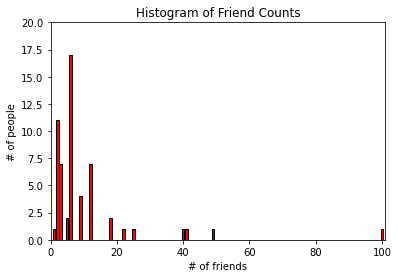

In [1]:
num_friends = [100, 49, 41, 40, 25, 22, 18, 18, 12, 12, 12, 12, 12, 12, 12, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
               6, 6, 6, 6, 6, 5, 5, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1]

from collections import Counter
import matplotlib.pyplot as plt

friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys, edgecolor = "black", color = "red")
plt.axis([0, 101, 0, 20])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [2]:
num_points = len(num_friends)
num_points

57

In [3]:
largest_value = max(num_friends)
smallest_value = min(num_friends)

print("the max value is:", largest_value, "the min value is:", smallest_value)

the max value is: 100 the min value is: 1


In [4]:
sorted_values = sorted(num_friends)
second_smallest_number = sorted_values[1]
second_smallest_number

2

In [5]:
from typing import List

def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

mean(num_friends)

10.333333333333334

In [6]:
def _median_odd(xs: List[float]) -> float:
    """If len(xs) is odd, the median is the middle element"""
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
    """If len(xs) is even, it's the average of the middle two elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2  # e.g. length 4 => hi_midpoint 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
    """Finds the 'middle-most' value of v"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2

In [7]:
median(num_friends)

6

In [8]:
def quantile(xs: List[float], p: float) -> float:
    """Returns the p-th percentile value in x"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

In [9]:
quantile(num_friends, 0.10)

2

In [10]:
quantile(num_friends, 0.50)

6

In [11]:
# most common values

def mode(x: List[float]) -> List[float]:
    """Returns a list, since there might be more than one mode!"""
    counts = Counter(x)
    max_count = max(counts.values())
    
    return [x_i for x_i, count in counts.items()
           if count == max_count]


In [12]:
mode(num_friends)

[6]

In [13]:
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

data_range(num_friends)

99

In [14]:
%run /home/eypsrcnuygr/personal/Machine-Learning-Series/Math/LinearAlgebra/LinearAlgebraOverview.ipynb

In [15]:
def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has 0 mean)"""
    x_bar = mean(xs)
    return [x- x_bar for x in xs]

def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "Variance requires at least two elements"
    
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

In [16]:
variance(num_friends)

240.26190476190473

In [17]:
import math

def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

standard_deviation(num_friends)

15.500384019820435

In [18]:
def interquartile_range(xs: List[float]) -> float:
    """Returns the difference between the 75%-ile and the 25%-ile"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

interquartile_range(num_friends)

9

In [19]:
def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"
    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)


In [20]:
def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stadev_y
    else:
        return 0
    